# INFORME ESTADÍSTICO: DATASET CURSOS UDEMY
Gonzalo López Blanquer y Eduardo Abad Zabala


A continuación vamos a analizar una base de datos de UDEMY, donde tenemos información acerca de los diferentes cursos y sus características.


Como primer paso, hemos importado todas las librerías que usaremos para el documento

In [ ]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fitter import Fitter





- Seaborn y Matplotlib nos permitirán la visualización de los datos en forma de distintos gráficos.

- pandas la utilizamos para el tratamiento y manipulación del dato.

- Numpy nos sirve para trabajar con cálculos numéricos y arrays.

- statsmodel.api nos sirven para profundizar más en el análisis estadístico, como a través de regresiones o pruebas de normalidad.

- Scipy.stats incluye herramientas de estadística avanzada, como contrastes de hipótesis, intervalos de confianza o explorar distribuciones de los datos.

- Fitter nos sirve para ver a qué distribución se parece más nuestra función.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving udemy_courses_dataset.csv to udemy_courses_dataset.csv


In [ ]:
# Cargamos nuestro dataset
data=pd.read_csv('udemy_courses_dataset.csv')
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


## 1. Elección de datos y breve descripción de su naturaleza

### Naturaleza de los datos

Como podemos observar, tenemos 11 variables diferentes y cada una nos ofrece una información distinta.

En cuanto al tipo de dato/variable, podemos diferenciar entre :

- CUANTITATIVAS : variables que se muestran con números

  - Discretas : números enteros
    
  - Continuas : numeros con decimales

- CATEGÓRICAS : variables que se muestran con etiquetas o nombres

  - Nominativas: etiquetas

  - Ordinales: etiquetas con un orden

Analizando la tipología de las variables de nuestro dataset observamos que :



- **Variables categóricas** --> subject, level, is_paid, course_id, course_title, url, published_timestamp
- 

- **Variables cuantitativas**:
    - **Variables discretas** --> price, num_suscribers, num_reviews, num_lectures
    - **Variables continuas** --> content_duration


Vemos las columnas/variables del dataset

In [ ]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Observamos el tipo de dato de cada variable, como el caso de num_reviews, num_lectures, num_subscribers són datos enteros (int64).

Otras variables como content_duration són de tipo float (decimal).

La variable is_paid es de tipo booleano (yes/no).

In [ ]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


**Limpieza del dato**

Hemos visto que en nuestro dataset hay alguna variable que no nos aporta ningún valor, como es el caso de 'course_id' y 'url'. Por tanto vamos a eliminarlas de nuestro dataset . De esta manera nos queda el dataset más limpio y claro .

In [ ]:
data=data.drop(columns={'course_id','url'})


Con el data.describe() que hemos ejecutado una líneas arriba podemos ver que hay cursos que tienen duración= 0, número de suscriptores= 0. Estos cursos no tendrán sentido en nuestro dataset, ya que no aportan información real

In [ ]:
data[data['content_duration'] == 0].count()


,0
course_title,1
is_paid,1
price,1
num_subscribers,1
num_reviews,1
num_lectures,1
level,1
content_duration,1
published_timestamp,1
subject,1


Vemos que solo es un curso el que no tiene duración. No lo eliminamos ya que aparte de que no afectará mucho a los valores de nuestro dataset. Se puede deber a que no tenga vídeos y solo contenido en pdf por ejemplo. Ahora trataremos los cursos que no tienen suscriptores

In [ ]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['year_published'] = data['published_timestamp'].dt.year
courses_by_year = data.groupby('year_published').size()
print(courses_by_year)

year_published
2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     715
dtype: int64


In [ ]:
courses_no_subscribers = data[data['num_subscribers'] == 0]
print(courses_no_subscribers['year_published'])

453     2016
454     2017
455     2017
456     2017
457     2017
        ... 
2402    2017
2403    2017
2404    2017
2405    2017
2418    2017
Name: year_published, Length: 70, dtype: int32


In [ ]:
courses_no_subscribers.count()

,0
course_title,70
is_paid,70
price,70
num_subscribers,70
num_reviews,70
num_lectures,70
level,70
content_duration,70
published_timestamp,70
subject,70


Tenemos 70 cursos sin suscriptores en 2017 frente a los 715 cursos totales que hay en ese año

Vemos que los cursos que tienen 'num_subscribers' = 0 son todos de 2017 menos uno de 2016, esto se puede deber a que están recién lanzados y no le ha dado tiempo a la gente a suscribirse. Además vemos que solo el 10% de cursos de 2017 no tienen suscriptores, por lo que no tendría sentido eliminar este año para hacer nuestros cálculos posteriores

[MRDB]: Buena explicación del proceso

## 2. Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo

# DESCRIPTIVA UNIVARIANTE

Vamos a analizar cada variable por separado para ver características de cada una. Dependiendo del tipo de variable que sea la analizaremos de una determinada manera. En el caso de las variables categóricas el análisis se centra en el conteo y la distribución que siguen.
Y, en el caso de las variables cuantitativas vamos a describir características como la media,moda, mediana, cuartiles,desviación típica...

Primero vamos a hacer una breve descripción de cada variable, y después vamos a verlas representadas en distintos tipos de gráficos.

Las variables cuantitativas se suelen ver representadas en gráficos como  histogramas (para ver la forma de la distribución), gráficos de densidad, boxplot(para ver dispersión y outliers=valores atípicos).

Las variables categóricas se suelen ver representadas en gráficos como gráfico de barras, pie-chart.

 Empezamos con el análisis univariante de las **variables categóricas **:






In [ ]:
data['level'].value_counts()

,count
level,
All Levels,1929
Beginner Level,1270
Intermediate Level,421
Expert Level,58


La variable 'level' está compuesta por 4 niveles diferentes ('All Levels' , 'Beginner Level', 'Intermediate Level' , 'Expert Level')

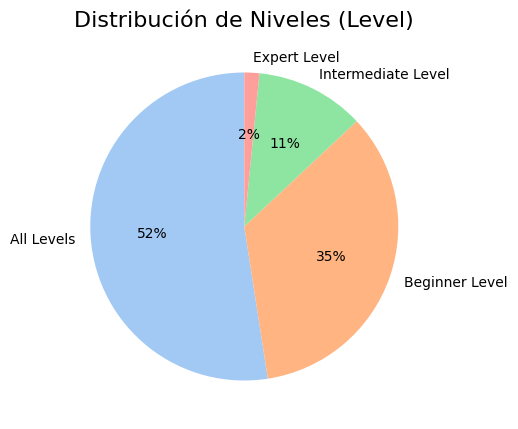

In [ ]:
# Visualización de la variable 'level' en un piechart
# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['level'].value_counts()

# Definir etiquetas y colores
labels = frecuencias.index  # Etiquetas basadas en las categorías únicas
sizes = frecuencias.values  # Frecuencias de las categorías
colors = sns.color_palette('pastel')[0:len(labels)]  # Colores para cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,  # Valores para el gráfico (frecuencias)
    labels=labels,  # Etiquetas de las categorías
    colors=colors,  # Colores definidos
    autopct='%.0f%%',  # Mostrar porcentajes con 0 decimales
    startangle=90  # Girar el inicio del gráfico para mejor visualización
)

# Título del gráfico
plt.title('Distribución de Niveles (Level)', fontsize=16)
plt.show()

A través del piechart comprobamos que la variable 'level' está compuesta mayoritariamente por 'All Levels' (52 %) seguida de ' Beginner Level' (35%), ' Intermediate Level' (11%) y por último 'Expert Level' (2%).

Por lo tanto, los cursos de Udemy principalmente van dirigidos a todos los niveles, aunque tienen más cursos para principiantes que para expertos.

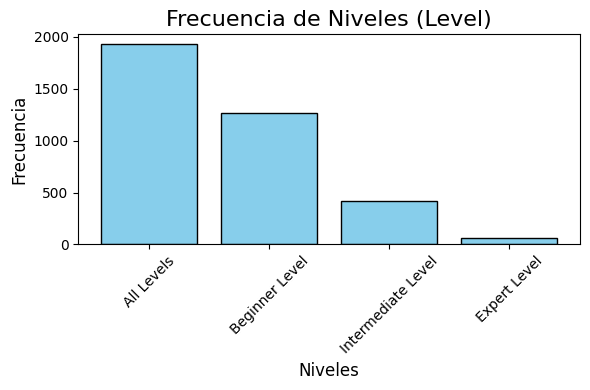

In [ ]:
# Gráfico de barras

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['level'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = frecuencias.index  # Etiquetas de las categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Frecuencia de Niveles (Level)', fontsize=16)
plt.xlabel('Niveles', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas

plt.show()

In [ ]:
data['is_paid'].value_counts()

,count
is_paid,
True,3368
False,310


La variable 'is_paid' es un dato de tipo booleano (0,1), eso significa que si NO es un curso de pago se marca un 0, y si es un curso de pago se marca con un 1. En este caso hay muchos más cursos de pago que gratis.


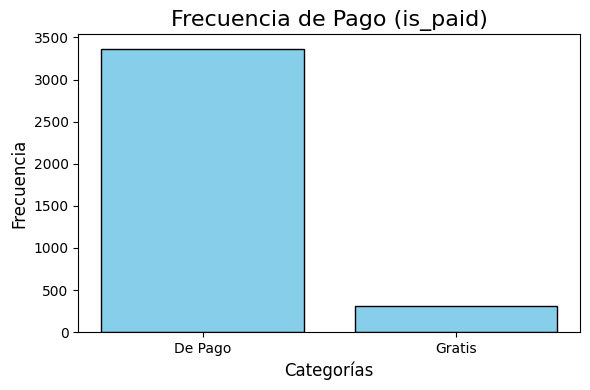

In [ ]:
# Calcular las frecuencias de cada categoría en 'is_paid'
frecuencias = data['is_paid'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = ['De Pago', 'Gratis'] if data['is_paid'].dtype == 'bool' else frecuencias.index  # Etiquetas de categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Frecuencia de Pago (is_paid)', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(labels, rotation=0)  # Asegurar que las etiquetas sean correctas
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas
plt.show()


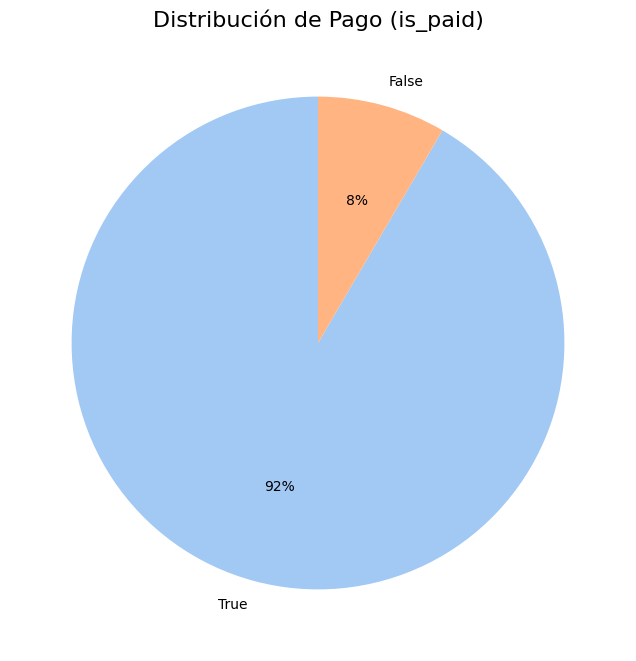

In [ ]:
# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['is_paid'].value_counts()

# Definir etiquetas y colores
labels = frecuencias.index  # Etiquetas basadas en las categorías únicas
sizes = frecuencias.values  # Frecuencias de las categorías
colors = sns.color_palette('pastel')[0:len(labels)]  # Colores para cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,  # Valores para el gráfico (frecuencias)
    labels=labels,  # Etiquetas de las categorías
    colors=colors,  # Colores definidos
    autopct='%.0f%%',  # Mostrar porcentajes con 0 decimales
    startangle=90  # Girar el inicio del gráfico para mejor visualización
)

# Título del gráfico
plt.title('Distribución de Pago (is_paid)', fontsize=16)
plt.show()

In [ ]:
data['subject'].value_counts()

,count
subject,
Web Development,1200
Business Finance,1195
Musical Instruments,680
Graphic Design,603


La variable 'subject' está formada por 4 tipos ( 'Web Development', 'Business Finance', 'Musical Instruments' , ' Graphic Design' )

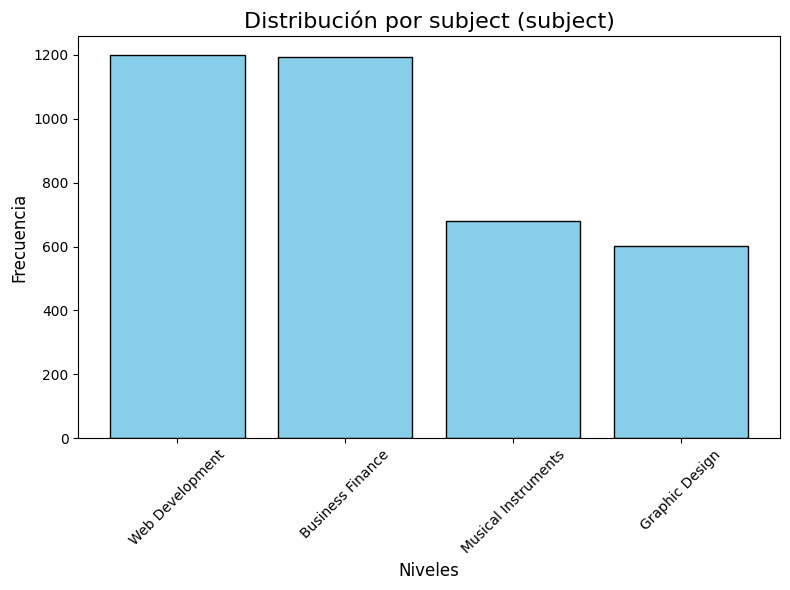

In [ ]:
# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['subject'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = frecuencias.index  # Etiquetas de las categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución por subject (subject)', fontsize=16)
plt.xlabel('Niveles', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas

plt.show()

Observamos cómo la mayoria de asignaturas ( 'subject' ) són de 'Web Development' y de 'Business Finance' .  Mientras que las asignaturas de 'Grapfic Design' y 'Musical Instruments' presentan un número de cursos bastante similar.

 Ahora pasamos al análisis univariante de las **variables cuantitativas **:


In [ ]:
data.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration,year_published
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213
std,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317
min,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


In [ ]:
data['num_subscribers'].describe()

,num_subscribers
count,3678.000000
mean,3197.150625
std,9504.117010
min,0.000000
25%,111.000000
50%,911.500000
75%,2546.000000
max,268923.000000


La variable cuantitativa 'num_subscribers' presenta una media de 3197 suscriptores por curso, mientras que la mediana es de 911 suscriptores ( esto nos muestra que no sigue una distribución normal, ya que media y mediana están muy alejadas) .

<ipython-input-27-3614e2123871>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')


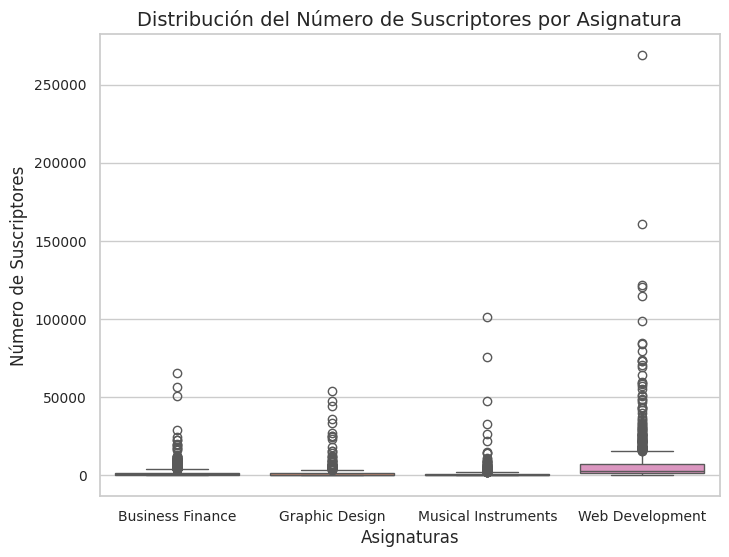

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución del Número de Suscriptores por Asignatura', fontsize=14)
plt.xlabel('Asignaturas', fontsize=12)
plt.ylabel('Número de Suscriptores', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

Viendo el gráfico podemos comprobar que la asignatura de 'Web Development' es la asignatura con mayor número de suscriptores (y la que más outliers=valores atípicos presenta). El hecho de tener muchos outliers nos indica que hay una gran dispersión en cuanto a el número de suscriptores en los cursos de web development ( algunos cursos tienen muchísimos más suscriptores que la media).

In [ ]:
data['price'].describe()

,price
count,3678.000000
mean,66.049483
std,61.005755
min,0.000000
25%,20.000000
50%,45.000000
75%,95.000000
max,200.000000


La media de la variable 'price' de los cursos ofrecidos es de 66 euros, mientras que la mediana está en 45. Esto nos indica que hay bastantes outliers o valores extremos de algunos cursos que tienen un precio muy alto, por lo que hacen que la media sea más alta, pero la mediana nos indica que el 50% de los cursos cuestan más de 45 euros, mientras que la media del precio por curso es de 66 euros. Concluimos que el hecho de tener algunos cursos con un precio mucho más alto que la mayoría, hacen que la media sea más grande.

<Axes: title={'center': 'Histograma de price'}, ylabel='Frequency'>

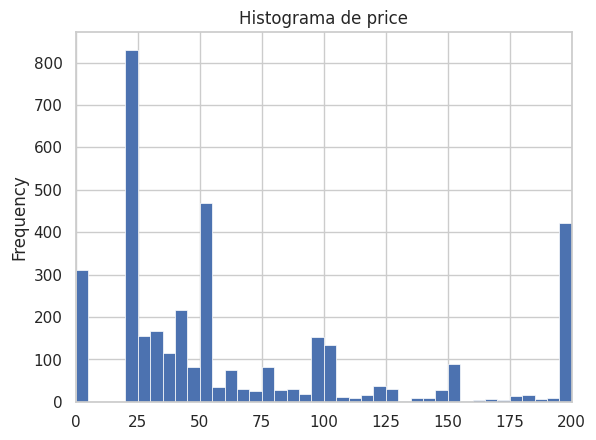

In [ ]:
# Visualizamos PRICE en histograma
data["price"].plot(kind='hist',bins=40, linewidth=0.5, edgecolor="white", title = "Histograma de price", xlim=(0, 200))


La mayoría de los cursos se encuentran en el rango de 20 a 25 euros. No obstante, en el rango de precios de 30 a 55 hay una cantidad de cursos parecidas ( de 50 a 55 euros hay muchos cursos ) . También se observa que para un precio de 200€ hay muchos cursos, esto se puede deber a dos motivos, a que se haya dado la casualidad que para este precio haya muchos o , que a partir de este precio han truncado todos a 200.
Podemos decir que no hay una relación lineal directa del número de cursos con la variable 'price'.

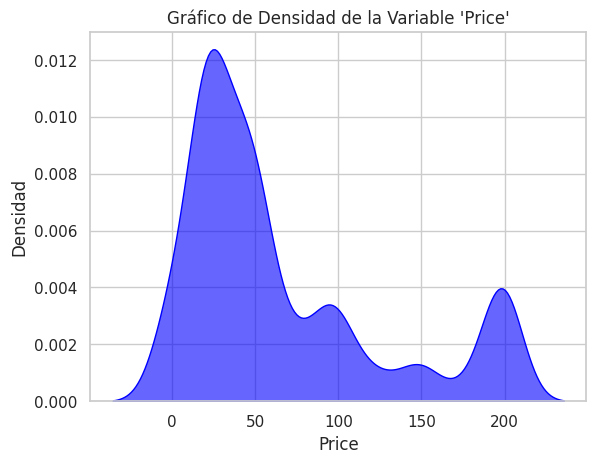

In [ ]:
# Gráfico de densidad para la variable 'price'
sns.kdeplot(data=data, x='price', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()

Gracias al densityplot de la variable 'price' comprobamos que la mayoría de los cursos se encuentran entre 0 y 60 euros más o menos.

In [ ]:
data['num_reviews'].describe()

,num_reviews
count,3678.000000
mean,156.259108
std,935.452044
min,0.000000
25%,4.000000
50%,18.000000
75%,67.000000
max,27445.000000


La variable 'num_reviews' presenta una media de 156 reseñas por curso, mientras que la mediana está en 18 ( la gran separación entre media y mediana podría indicarnos que no sigue una distribución normal, pero habría que seguir estudiandola ).
Esta gran diferencia se debe a que hay unos valores atípicos extremos en algunos cursos que tienen un número muy grande de reviews, por lo tanto hace que la media de reviews de todos los cursos sea más grande.

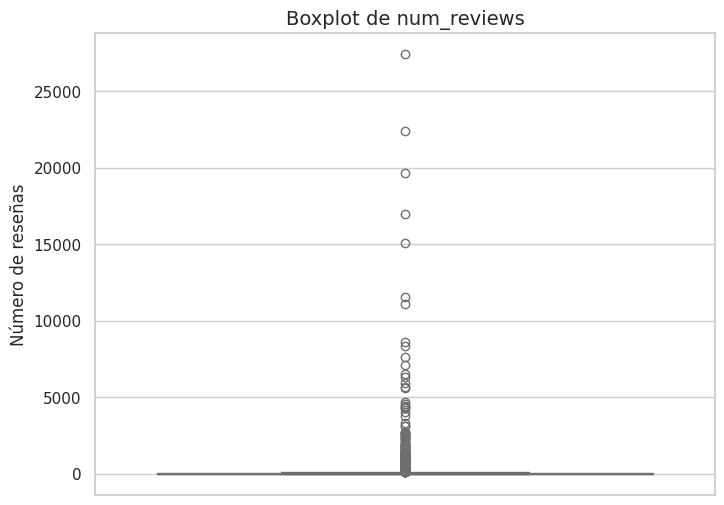

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(data=data, y='num_reviews', color='skyblue')  # Boxplot de la variable
plt.title('Boxplot de num_reviews', fontsize=14)
plt.ylabel('Número de reseñas')
plt.show()


In [ ]:
data['content_duration'].describe()

,content_duration
count,3678.000000
mean,4.094517
std,6.053840
min,0.000000
25%,1.000000
50%,2.000000
75%,4.500000
max,78.500000


La media de la variable 'content_duration' es de 4 y la mediana de 2 ( horas).

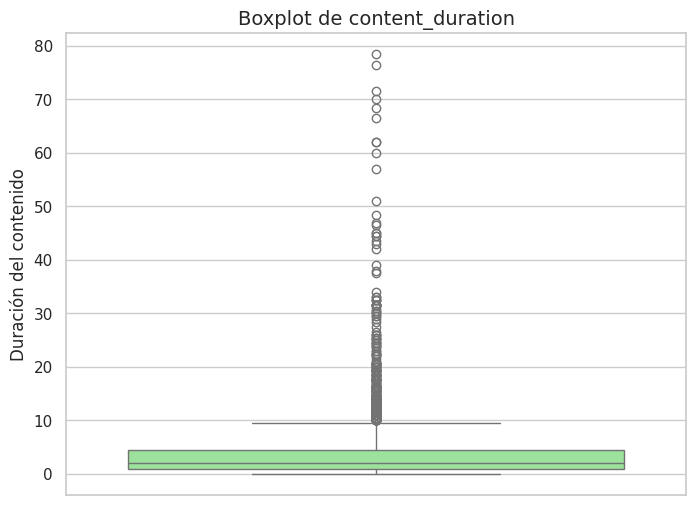

In [ ]:
# Crear el boxplot para content_duration
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(data=data, y='content_duration', color='lightgreen')  # Boxplot de content_duration
plt.title('Boxplot de content_duration', fontsize=14)
plt.ylabel('Duración del contenido')
plt.show()


Contrastando la información estadística sobre la variable 'content_duration' con su representación en el gráfico de cajas (boxplot), observamos que el 75% de los cursos duran menos de 4.5 horas. Y la media de la duración de un curso es de 4 horas, mientras que la mediana es de 2 horas por curso. Esto se debe a los outliers, ya que hay algunos cursos que tienen una duración bastante más alta que los demás cursos, port tanto hace que suba la media.

In [ ]:
data['num_lectures'].describe()

,num_lectures
count,3678.000000
mean,40.108755
std,50.383346
min,0.000000
25%,15.000000
50%,25.000000
75%,45.750000
max,779.000000


La media de los cursos de udemy presentan una media de 40 clases, mientras que la mediana es de 25 clases.

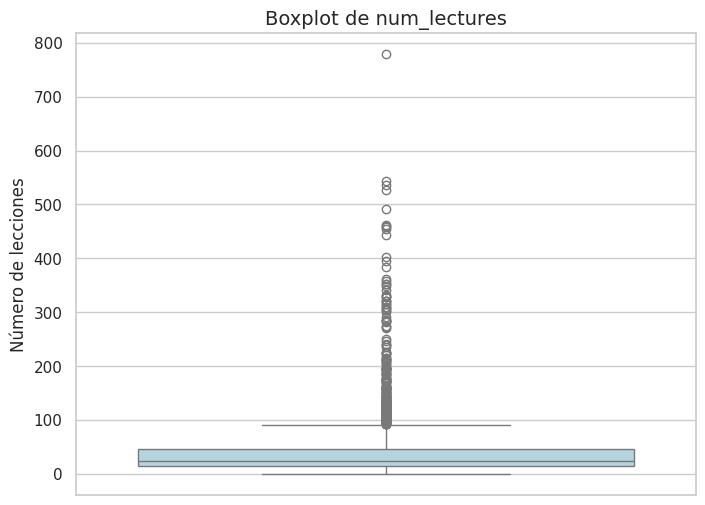

In [ ]:
# Crear el boxplot para num_lectures
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(data=data, y='num_lectures', color='lightblue')  # Boxplot de num_lectures
plt.title('Boxplot de num_lectures', fontsize=14)
plt.ylabel('Número de lecciones')
plt.show()


Observamos que sucede prácticamente la misma situación que en las anteriores variables cuantitativas, el hecho de que algunos cursos tengan un número de clases mucho más alto que el resto hace que la media de todos sea más grande (no significa que sea más representativa). Ya que la mediana es un estadístico bastante más representativo.

Muy bien! lE habáis sacado información interesante a los gráficos. Como tiene que ser :)

# DESCRIPTIVA BIVARIANTE

En este apartado vamos a describir la relación lineal entre dos variables : ver como evoluciona una variable a medida que la otra variable se comporta de determinada manera .

Dendiendo del tipo de variables que vamos a estudiar, utilizaremos distintas técnicas para hacer la descriptiva bivariante:

- Si són dos variables cuantitativas :  matriz de correlación, scatterplot de dos variables

- Variable cuantitativa con categórica: boxplot, barplot, histogramas por grupos.

- Variable categórica con categórica : gráficos de barras agrupados, tablas de contingencia.








<Axes: xlabel='price', ylabel='num_subscribers'>

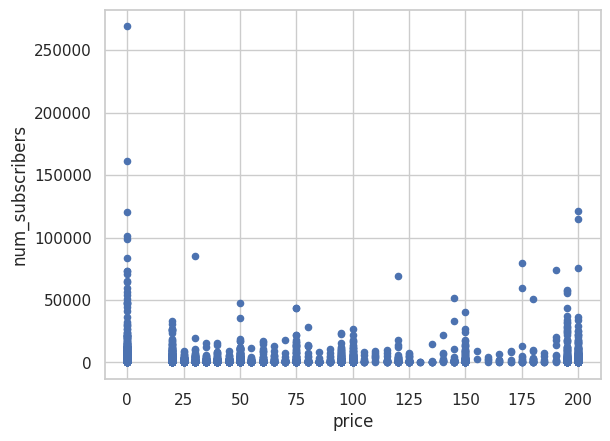

In [ ]:
# Visualizamos dos variables en ScatterPlot (variable cuantitativa y variable cuantitativa)
data.plot(x='price', y='num_subscribers', kind='scatter')


En este scatterplot (gráfico de dispersión) estamos viendo como se relacionan las variables 'num_subscribers' con la variable 'price'.
Observamos que independientemente del pecio de los cursos, presentan un número de suscriptores bastante similar . Hay que destacar que los cursos gratuitos presentan el mayor número de suscriptores, pero cuando el precio de los cursos aumenta el número de suscriptores también lo hace.


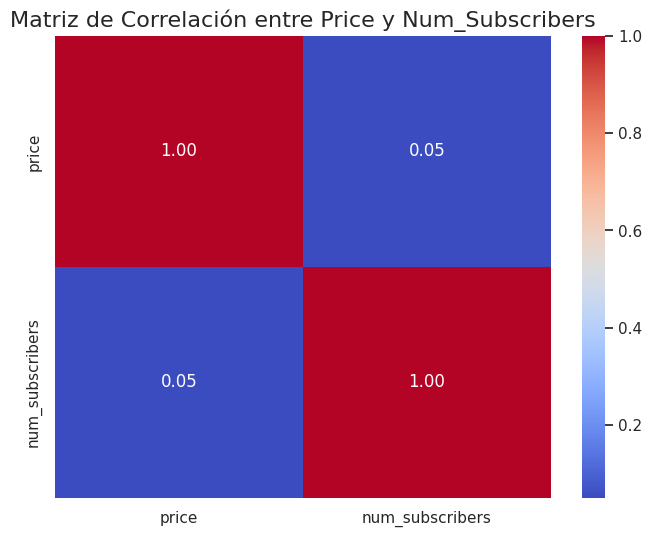

In [ ]:
# Calcular la correlación entre 'price' y 'num_subscribers'
correlation = data[['price', 'num_subscribers']].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Personalización del gráfico
plt.title('Matriz de Correlación entre Price y Num_Subscribers', fontsize=16)
plt.show()


Observamos tanto en el Gráfico de Dispersión (ScatterPlot) cómo en la matrix correlacional que no tienen apenas relación lineal entre la variable price y num_subscribers.

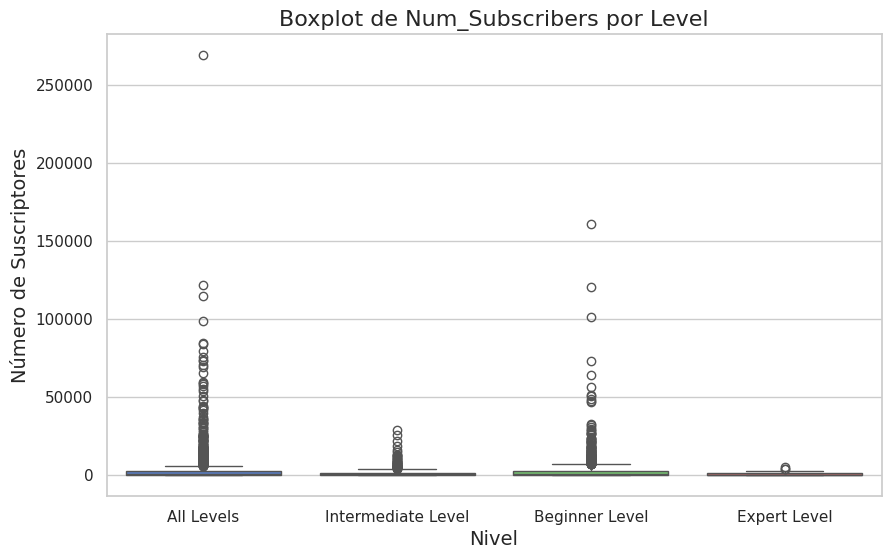

In [ ]:
# Análisis bivariante de categórica con cuantitativa

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='num_subscribers', data=data, palette="muted", hue= 'level', dodge= False)

# Personalización del gráfico
plt.title('Boxplot de Num_Subscribers por Level', fontsize=16)
plt.xlabel('Nivel', fontsize=14)
plt.ylabel('Número de Suscriptores', fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
data.groupby('level')['num_subscribers'].mean()

,num_subscribers
level,
All Levels,3584.798341
Beginner Level,3190.427559
Expert Level,865.448276
Intermediate Level,1762.482185


Observando la media de suscriptores por cada nivel de los cursos y contrarestándola con los gráficos llegamos a la conclusión de que los cursos dirigidos a 'All Levels' y a 'Beginner Level' tienen una media de suscriptores bastante más alta que la de 'Intermediate Level' y 'Expert Level' siendo esta última la media más baja.

Teniendo en cuenta los outliers en el boxplot, podemos decir que los niveles con un mayor número de suscriptores ( All level y beginner level) presentan una media más alta debido a que tienen algunos cursos con un número de suscriptores muchísimo más alto que los demás , por eso sube la media.

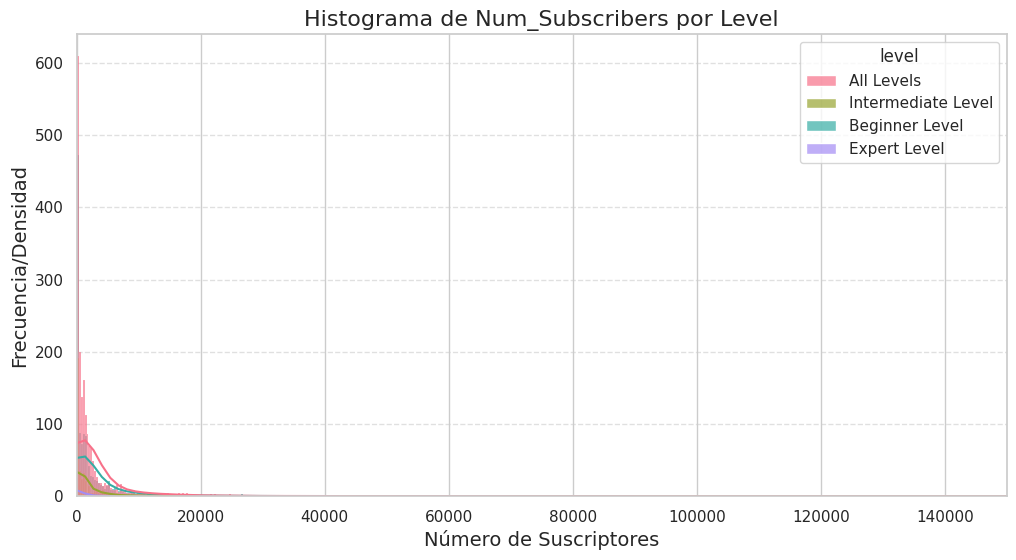

(None,)

In [ ]:
# Crear el histograma mejorado
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x='num_subscribers',
    hue='level',
    kde=True,  # Añade la línea de densidad
    multiple='layer',  # Cambia de 'stack' a 'layer' para ver las distribuciones separadas
    palette='husl',  # Cambia la paleta para un diseño más claro
    alpha=0.7  # Ajusta la transparencia para mejor visualización
)

# Personalización del gráfico
plt.xlim(0, 150000)
plt.title('Histograma de Num_Subscribers por Level', fontsize=16)
plt.xlabel('Número de Suscriptores', fontsize=14)
plt.ylabel('Frecuencia/Densidad', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Añade una cuadrícula ligera para mejorar la lectura

# Mostrar el gráfico
plt.show(),


Este histograma, se ve de esta forma debido a los outliers tan grandes que hay , si le ponemos un limite en el eje x cerca de la media de numero de suscriptores se verá mucho mejor

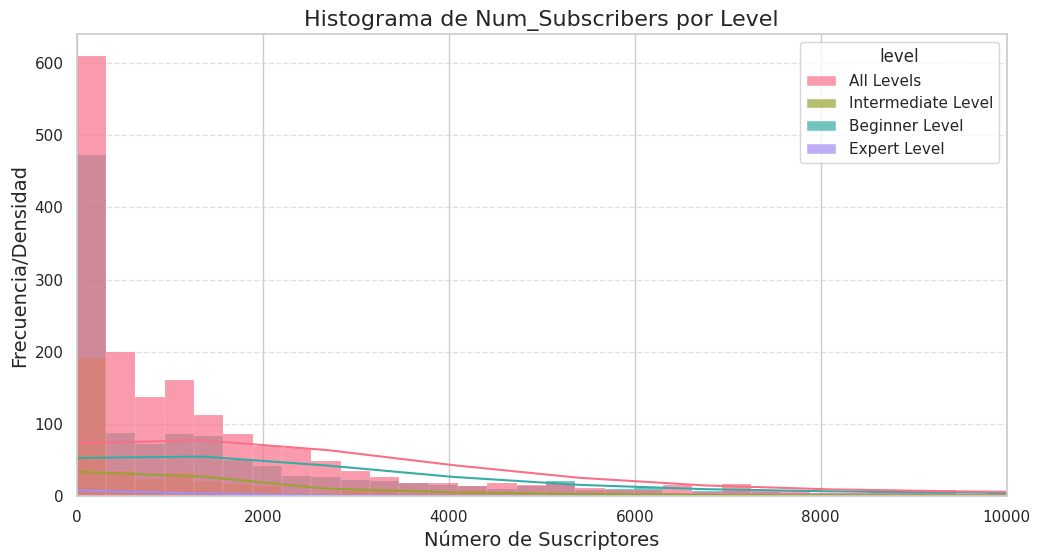

(None,)

In [ ]:
# Crear el histograma mejorado
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x='num_subscribers',
    hue='level',
    kde=True,  # Añade la línea de densidad
    multiple='layer',  # Cambia de 'stack' a 'layer' para ver las distribuciones separadas
    palette='husl',  # Cambia la paleta para un diseño más claro
    alpha=0.7  # Ajusta la transparencia para mejor visualización
)

# Personalización del gráfico
plt.xlim(0, 10000)
plt.title('Histograma de Num_Subscribers por Level', fontsize=16)
plt.xlabel('Número de Suscriptores', fontsize=14)
plt.ylabel('Frecuencia/Densidad', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Añade una cuadrícula ligera para mejorar la lectura

# Mostrar el gráfico
plt.show(),

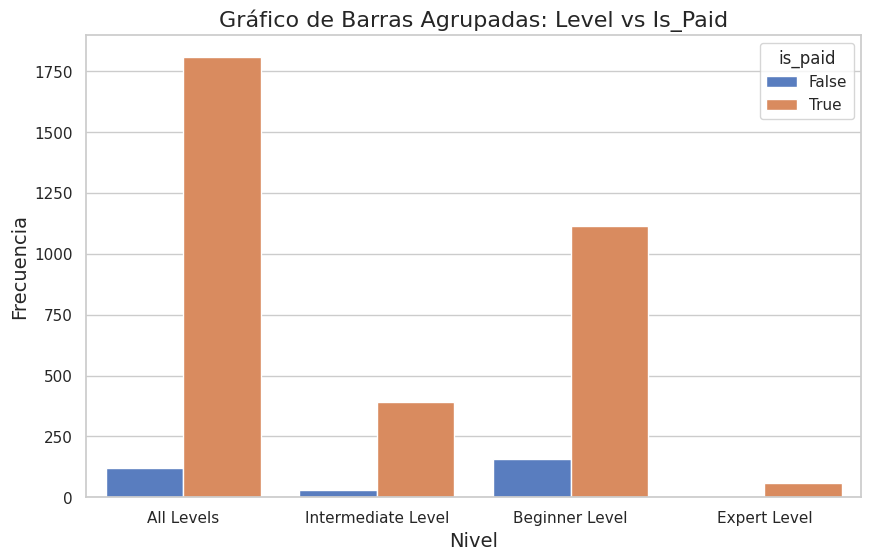

In [ ]:
# Análisis bivariante entre dos variables categóricas

# Gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.countplot(x='level', hue='is_paid', data=data, palette='muted')

# Personalización del gráfico
plt.title('Gráfico de Barras Agrupadas: Level vs Is_Paid', fontsize=16)
plt.xlabel('Nivel', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['level'], data['is_paid'])

# Calcular el porcentaje por fila
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Añadir los totales y mostrar ambas tablas
contingency_table['Total'] = contingency_table.sum(axis=1)
contingency_table_percentage['Total (%)'] = contingency_table_percentage.sum(axis=1)

# Mostrar las tablas
print("Tabla de Contingencia:")
print(contingency_table)

print("\nTabla de Contingencia con Porcentajes (%):")
print(contingency_table_percentage)



Tabla de Contingencia:
is_paid             False  True  Total
level                                 
All Levels            122  1807   1929
Beginner Level        158  1112   1270
Expert Level            0    58     58
Intermediate Level     30   391    421

Tabla de Contingencia con Porcentajes (%):
is_paid                 False        True  Total (%)
level                                               
All Levels           6.324520   93.675480      100.0
Beginner Level      12.440945   87.559055      100.0
Expert Level         0.000000  100.000000      100.0
Intermediate Level   7.125891   92.874109      100.0


Estudiando el análisis bivariante de dos variables categóricas como es el caso de 'is_paid' con 'level', visualizamos en el gráfico y en la tabla de contingencia como los cursos dirigidos a 'All levels' y 'Beginner Level' y 'Intermediate Level' presentan un % similar de cursos gratis (entre el 6 y el 12% de esos cursos són gratis). Mientras que los cursos dirigidos a 'Expert Level' tienen un 0% de cursos gratis.


Esto nos dice que la gente que quiere cursos de nivel experto sólo los quiere de pago. Mientras que en niveles intermedios y principiantes hay un mínimo % de clientes que optan por los cursos gratis.

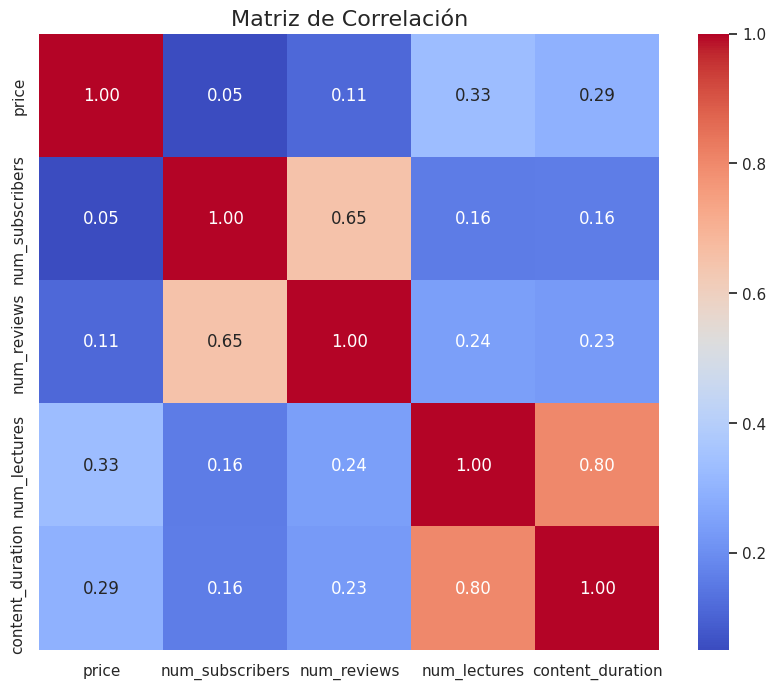

In [ ]:
# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación y crear el heatmap
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Título del heatmap
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

Si utilizamos la matriz de correlación entre nuestras variables cuantitativas, observamos que 'num_lectures' y 'content_duration' mantienen una relación lineal notable ( de 0.8), lo cuál se nos hace "obvio" ya que si aumenta la variable número de clases es lógico pensar que aumenta la variable duración.

También cabe destacar la relación que mantienen variables como 'num_reviews' y 'num_subscribers' ( de 0.65). Eso significa que al aumentar la variablle número de suscriptores también aumenta la variable número de reviews ( también se nos hace obvio, pero la matriz correlacional nos lo muestra) .

##3. Comprobación de la normalidad de alguna/s variable/s del conjunto de datos

Para la comprobación de la normalidad comprobaremos diferentes aspectos, que nos indicaran la normalidad o no de nuestra variable. Estos serán los aspectos a tener en cuenta:
1. Simetría entre media y mediana
2. Gráfico Histograma
3. Gráfico Densidad
4. Gráfico de cajas
5. Gráfico Q-Q plot

In [ ]:
data['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

El valor de la media (mean) y de la mediana (50%) no son próximos

<Axes: title={'center': 'Histograma con pandas'}, ylabel='Frequency'>

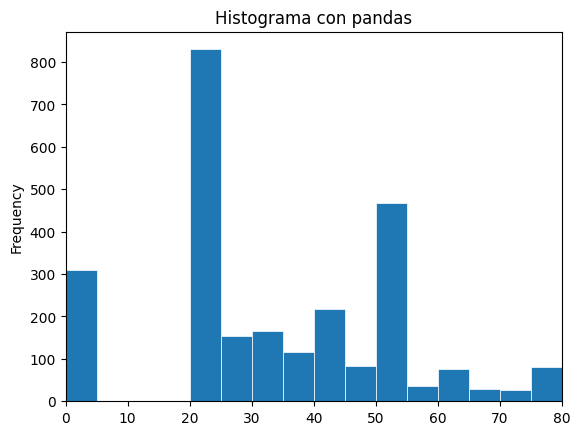

In [ ]:
# Visualizamos la variable PRICE en histograma
data["price"].plot(kind='hist',bins=40, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 80))

Vemos que nuestro histograma no sigue una distribución normal, ya que debería ser algo parecido a lo que se muestra en la imagen.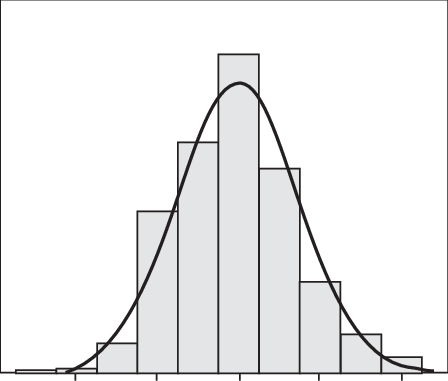

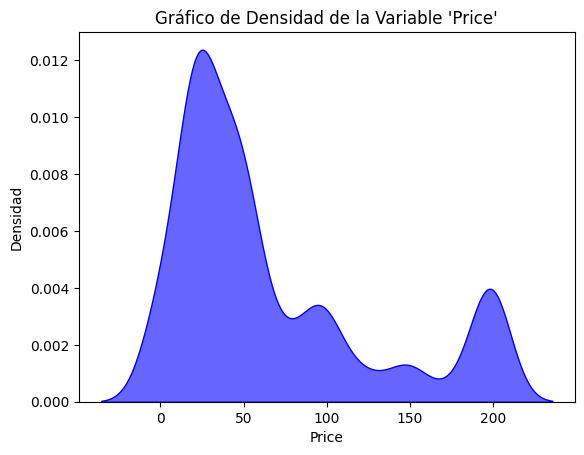

In [ ]:
# Gráfico de densidad para la variable 'price'
sns.kdeplot(data=data, x='price', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()

El gráfico de densidad tampoco se asemeja a uno de distribución normal

<Axes: >

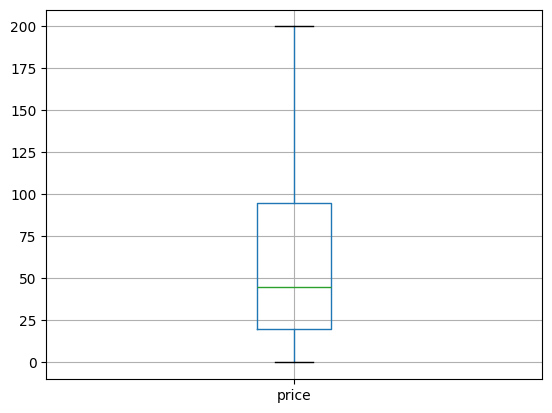

In [ ]:
# Visualizamos PRICE en boxplot
data.boxplot(column="price")

Tras analizar este boxplot, podemos ver ciertos indicadores de que nuestra variable no sigue una d.normal, estos pueden ser:
- La mediana no está centrada, entre Q2 y Q3
- Los bigotes deberían tener longitudes similares, mientras que en el nuestro vemos que la mediana de los precios se aproxima más hacia el bigote de precios = 0€ que el de precios = 200€

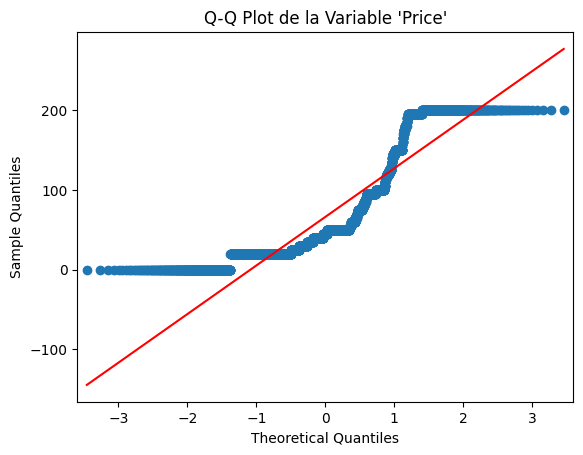

In [ ]:
# Q-Q plot para la variable 'price'
sm.qqplot(data['price'], line='s')
plt.title("Q-Q Plot de la Variable 'Price'")
plt.show()


Para que el este gráfico, nos sirviera como indicar de que nuestra variable sigue una distribución normal, nuestros puntos deberían estar sobre la línea de la recta, o al menos acercarse. Como vemos, no lo sigue. Esto se debe a que tenemos muchos cursos gratuitos (se observan muchos puntos en 0) y también tenemos muchos cursos de 200€

Tras llegar a la conclusión de que nuestra variable 'price' no sigue una distribución normal, vamos a realizar una función que nos indica entre diferentes distribuciones cual es la que más se asemeja para nuestra variable

c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Mejor distribución: beta
Parámetros: (0.6062736129649037, 0.9921910509055593, -1.740427898558937e-27, 202.5832648612008)


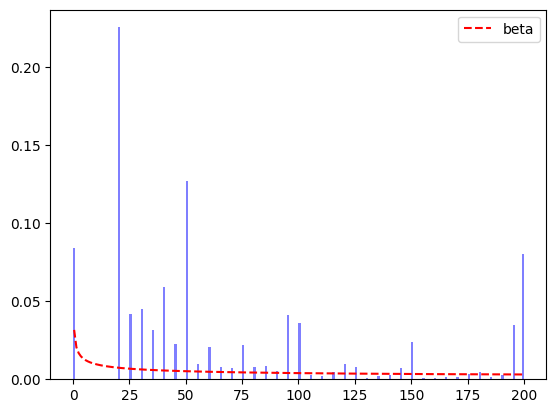

In [ ]:
# PARA VER QUÉ DISTRIBUCIÓN ES LA MÁS PARECIDA A LOS DATOS


# Definir la función best_fit_distribution
def best_fit_distribution(data, bins=200, plot=False):
    DISTRIBUTIONS = [st.norm, st.expon, st.gamma, st.weibull_min, st.weibull_max, st.beta, st.lognorm]

    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution = None
    best_params = None
    best_sse = np.inf

    for distribution in DISTRIBUTIONS:
        try:
            params = distribution.fit(data)
            pdf = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            sse = np.sum(np.power(y - pdf, 2.0))

            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except Exception:
            pass
    if best_distribution:
        print(f"Mejor distribución: {best_distribution.name}")
        print(f"Parámetros: {best_params}")

        if plot:
            plt.hist(data, bins=bins, density=True, alpha=0.5, color='b')
            pdf = best_distribution.pdf(x, *best_params[:-2], loc=best_params[-2], scale=best_params[-1])
            plt.plot(x, pdf, 'r--', label=f'{best_distribution.name}')
            plt.legend()
            plt.show()

    return best_distribution, best_params

# Llamada a la función con una columna específica
mejor_distribucion, parametros = best_fit_distribution(data["price"], plot=True)

Nos aconseja que la distribución que mejor se asemeja es la beta

In [ ]:
data['num_subscribers'].describe()

,num_subscribers
count,3677.000000
mean,3198.020125
std,9505.263339
min,0.000000
25%,111.000000
50%,912.000000
75%,2547.000000
max,268923.000000


Observamos que la media es de 3198 suscriptores por curso mientras que la mediana es de 912.  Esta gran diferencia podría ser un indicador de que nuestra variable NO sigue una distribución normal, pero vamos a seguir estudiándola.

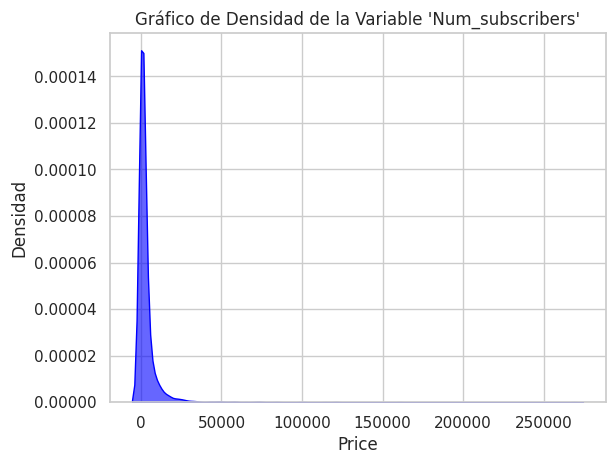

In [ ]:
# Gráfico de densidad para la variable 'num_subscribers'
sns.kdeplot(data=data, x='num_subscribers', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Num_subscribers'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()

En el densityplot no se aprecia muy bien.... vamos a seguir estudiándola.

<Axes: >

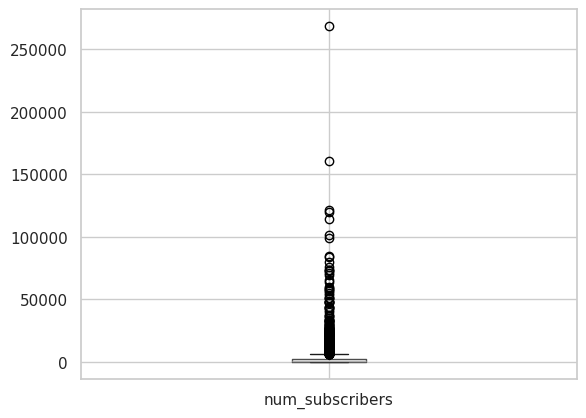

In [ ]:
# Visualizamos num_subscribers en boxplot
data.boxplot(column="num_subscribers")

En el boxplot tampoco tenemos mucha claridad, pero podemos ver como hay muchos outliers por encima del máximo que hacen que la media sea mucho mayor que la mediana.

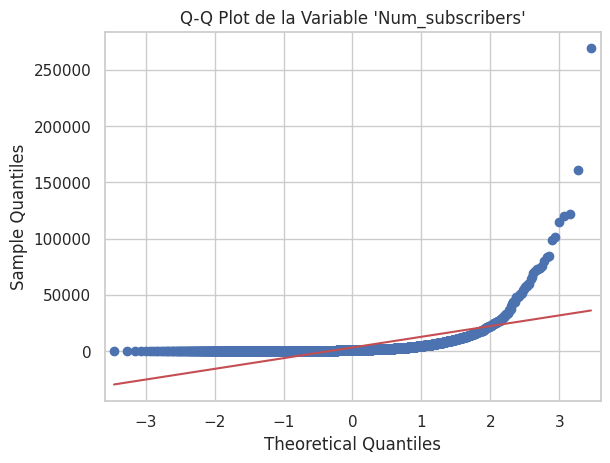

In [ ]:
# Q-Q plot para la variable 'num_subscribers'
sm.qqplot(data['num_subscribers'], line='s')
plt.title("Q-Q Plot de la Variable 'Num_subscribers'")
plt.show()

Con el Q-Q Plot comprobamos que nuestra avriable 'num_subscribers' NO sigue una distribución normal.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Mejor distribución: beta
Parámetros: (0.6031533946517038, 570.2674178155567, -2.2254393523415765e-24, 1088742.1941995504)


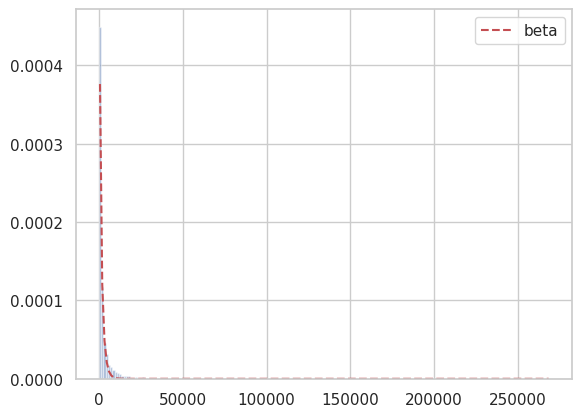

In [ ]:
# PARA VER QUÉ DISTRIBUCIÓN ES LA MÁS PARECIDA A LOS DATOS


# Definir la función best_fit_distribution
def best_fit_distribution(data, bins=200, plot=False):
    DISTRIBUTIONS = [st.norm, st.expon, st.gamma, st.weibull_min, st.weibull_max, st.beta, st.lognorm]

    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution = None
    best_params = None
    best_sse = np.inf

    for distribution in DISTRIBUTIONS:
        try:
            params = distribution.fit(data)
            pdf = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            sse = np.sum(np.power(y - pdf, 2.0))

            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except Exception:
            pass
    if best_distribution:
        print(f"Mejor distribución: {best_distribution.name}")
        print(f"Parámetros: {best_params}")

        if plot:
            plt.hist(data, bins=bins, density=True, alpha=0.5, color='b')
            pdf = best_distribution.pdf(x, *best_params[:-2], loc=best_params[-2], scale=best_params[-1])
            plt.plot(x, pdf, 'r--', label=f'{best_distribution.name}')
            plt.legend()
            plt.show()

    return best_distribution, best_params

# Llamada a la función con una columna específica
mejor_distribucion, parametros = best_fit_distribution(data["num_subscribers"], plot=True)

La variable 'num_subscribers' sigue una distribución beta.

SIguiendo los mismos pasos para analizar la Normalidad de las variables( estudiar simetría de la variable contrarestando media y mediana, visualizando en un histograma, densityplot y boxplot para ver que forma presenta su distribución, y el Q-Q Plot para ver si se asemeja o no a una distribución normal) hemos analizado las demás variables cuantitativas que nos quedaban ( como 'num_reviews'o 'num_lectures) y hemos llegado a la conclusión de que NO siguen una distribución normal.




[MRDB]: Muy bien explicado todo.

## 4. Estimación puntual y por intervalos de los parámetros poblacionales de algunas variables

En el apartado de ESTIMACIÓN, nos vamos a centrar en estimar ( o predecir) valores desconocidos de la población a través de valores de nuestro dataset.

Hay dos tipos de estimaciones:

- Estimación puntual : se centra en estimar un único valor ( parámetro muestral : como la media) y ver si es representativo con el parámetro poblacional

- Estimación por intervalos :proporciona un rango de valores dentro del cuál es probable que se encuentre el parámetro poblacional ( usando intervalos de confianza como el del 95%)

ESTIMACIÓN PUNTUAL

In [ ]:
data.groupby('subject')['num_subscribers'].mean()

,num_subscribers
subject,
Business Finance,1563.774895
Graphic Design,1763.097844
Musical Instruments,1245.130882
Web Development,6650.476667


In [ ]:
data['num_subscribers'].mean()

3198.0201251019853

Observamos que la media de suscriptores de todos los cursos de UDEMY es de 3198 suscriptores por curso, mientras que la media de suscriptores de cada curso es distinta dependiendo de la asignatura ('subject').

Nuestra estimación consiste en averiguar si la media de suscriptores de una asignatura ( media muestral) es representativa de la media de suscriptores de todos los cursos ( media poblacional)

Elegimos la asignatura Graphic Design, que de primeras observamos que tiene una media de suscriptores de 1763, a diferencia de la media de suscriptores de todos los cursos de udemy que es de 3198.

Aún así vamos a comprobarlo.

In [ ]:
from scipy.stats import ttest_1samp

# Definir el nombre de la categoría específica que deseas analizar
categoria_especifica = 'Graphic Design'

# Filtrar los datos de la categoría específica
grupo_especifico = data[data['subject'] == categoria_especifica]['num_subscribers']

# Calcular la media general de num_subscribers
media_general = data['num_subscribers'].mean()

# Realizar el test t para una muestra
stat, p_value = ttest_1samp(grupo_especifico, popmean=media_general)

# Mostrar resultados
print(f"Media de {categoria_especifica}: {grupo_especifico.mean():.2f}")
print(f"Media general: {media_general:.2f}")
print(f"Estadístico t: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print(f"La media de '{categoria_especifica}' es significativamente diferente de la media general.")
else:
    print(f"No hay evidencia suficiente para decir que la media de '{categoria_especifica}' es diferente de la media general.")

Media de Graphic Design: 1763.10
Media general: 3197.15
Estadístico t: -7.1528
Valor p: 0.0000
La media de 'Graphic Design' es significativamente diferente de la media general.


Obtenemos un pValor muy bajo, por tanto rechazamos la Hipótesis Nula de que la media de suscriptores de 'Graphic Design' es igual a la media de suscriptores de todos los cursos de Udemy.

Eso significa que la media de suscriptores de 'Graphic Design' no es representativa con la media de suscriptores de todos los cursos de Udemy.

ESTIMACIÓN POR INTERVALOS

In [ ]:
import numpy as np
import scipy.stats as stats

# Definir el nombre de la categoría específica
categoria_especifica = 'Graphic Design'

# Filtrar los datos de la categoría específica
grupo_especifico = data[data['subject'] == categoria_especifica]['num_subscribers']

# Calcular la media y la desviación estándar de la muestra
media_muestra = grupo_especifico.mean()
desviacion_estandar = grupo_especifico.std()

# Calcular el tamaño de la muestra
n = len(grupo_especifico)

# Nivel de confianza del 95%
nivel_confianza = 0.95

# Calcular el margen de error
margen_error = stats.t.ppf((1 + nivel_confianza) / 2, df=n-1) * (desviacion_estandar / np.sqrt(n))

# Calcular el intervalo de confianza
limite_inferior = media_muestra - margen_error
limite_superior = media_muestra + margen_error

# Mostrar resultados
print(f"Media de {categoria_especifica}: {media_muestra:.2f}")
print(f"Intervalo de confianza del 95%: [{limite_inferior:.2f}, {limite_superior:.2f}]")


Media de Graphic Design: 1763.10
Intervalo de confianza del 95%: [1369.36, 2156.84]


Tras estudiar la estimación por intervalos, vemos que con un intervalo de confianza del 95%  que la media de suscriptores  en 'Grapfic Design' está entre 1369.36 y 2156.84.



In [ ]:
data.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'published_timestamp',
       'subject'],
      dtype='object')

## 5. Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos

Los contrastes de hipótesis nos ayudan a tomar decisiones basadas en los datos que tenemos. Nos permiten  aceptar o rechazar una suposición inicial ( Hipótesis Nula) y ver si nuestros resultados són significativos o no lo son.

Están compuestos por una suposición inicial ( hipótesis nula, como por ejemplo, que la media de las patatas es de 50 euros) y una suposición alternativa ( hipótesis alternativa, la media de patatas NO es de 50 euros).



Luego, realizamos un contraste de hipótesis y obtenemos un valor p. Si el valor p es, por ejemplo, 0.03, eso significa que hay solo un 3% de probabilidad de que los datos observados ocurran si la hipótesis nula fuera cierta. Como este valor p es menor que 0.05, podemos rechazar la hipótesis nula y concluir que el precio promedio no es 50 euros.

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

Hipótesis:
Hipótesis nula (H₀): El número promedio de lecciones de los cursos de nivel avanzado es igual al número promedio de lecciones de todos los cursos.
Hipótesis alternativa (H₁): El número promedio de lecciones de los cursos de nivel avanzado es diferente al número promedio de lecciones de todos los cursos.

In [ ]:
from scipy.stats import ttest_1samp

# Filtrar los datos de los cursos de nivel avanzado (Expert Level)
cursos_avanzado = data[data['level'] == 'Expert Level']['num_lectures']

# Calcular la media general de lecciones en todos los cursos
media_general_lecciones = data['num_lectures'].mean()

# Realizar el test t para una muestra (compara el número de lecciones de los cursos avanzados con el promedio general)
stat, p_value = ttest_1samp(cursos_avanzado, media_general_lecciones)

# Mostrar los resultados
print(f"Media del número de lecciones de los cursos de nivel 'Expert': {cursos_avanzado.mean():.2f}")
print(f"Media general del número de lecciones: {media_general_lecciones:.2f}")
print(f"Estadístico t: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: El número promedio de lecciones de los cursos 'Expert' es diferente al promedio general.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula: El número promedio de lecciones de los cursos 'Expert' es igual al promedio general.")


Media del número de lecciones de los cursos de nivel 'Expert': 30.78
Media general del número de lecciones: 40.12
Estadístico t: -2.6267
Valor p: 0.0111
Rechazamos la hipótesis nula: El número promedio de lecciones de los cursos 'Expert' es diferente al promedio general.


Observamos que el pValor es de 0.0111, que es menor que 0.05, por tanto rechazamos la hipótesis nula de que la media de clases impartidas  en el nivel avanzado/experto es igual a la media de clases impartidas de los cursos destinados a todos los niveles.

Por tanto, con un 95% de confianza asumimos que la media de clases impartidas en el nivel avanzado (30.78) es DIFERENTE que la media de clases impartidas en los demás niveles (40.12) . Los cursos de nivel avanzado tienden a ofrecer MENOS clases que los cursos orientados a todos los niveles.
99% no

## 6. Realización de ANOVA

El test ANOVA se realiza para comparar diferentes poblaciones y ver si hay diferencias significativas en sus medias.

El ANOVA analiza dos variables, una continua (como el precio) y una categórica (como los niveles) y los requisitos para realizar el test ANOVA es que sus variables sigan una distribución Normal y que exista homocedasticidad (varianzas similares entre grupos).

Para verificar la homogeneidad de varianzas, se utiliza el test de Levene.

Si el ANOVA muestra que hay diferencias significativas (rechazo de la hipótesis nula de que las medias son iguales), se realiza un test post-hoc de Tukey. Este test nos ayuda a identificar qué grupos son los que difieren entre sí.

- ANOVA: Para variables paramétricas (que siguen una distribución conocida).
- Kruskal-Wallis: Para variables no paramétricas (que no siguen una distribución conocida).


En resumen, ANOVA nos dice si hay diferencias entre las medias y, si las hay, el test Tukey nos indica qué grupos difieren entre sí.

En nuestro test de anova vamos a analizar si diferentes poblaciones ( diferentes asignaturas) tienen la misma media de reviews.

Por tanto, la Hipótesis Nula : todas las asignaturas tienen la misma media de 'num_reviews' , y la Hipótesis Alternativa : todas las asignaturas NO tienen la misma media de 'num_reviews'.


Tras apreciar que ninguna de nuestras variables sigue una distribución normal, no podemos realizar ANOVA, por lo que recurriremos a realizar el test de Kruskal-Wallis

In [ ]:
from scipy.stats import kruskal
import pandas as pd

# Asegúrate de que tu dataset ya está cargado en tu variable (por ejemplo, `tu_dataset`)

# Crear listas separadas para cada grupo de subjects
groups = [group['num_reviews'].values for name, group in data.groupby('subject')]

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Mostrar resultados
print("Estadístico de Kruskal-Wallis:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos (rechazamos H0).")
else:
    print("No hay diferencias significativas entre los grupos (no se rechaza H0).")


Estadístico de Kruskal-Wallis: 980.18897013518
Valor p: 3.570317898934084e-212
Hay diferencias significativas entre los grupos (rechazamos H0).


Como podemos observar en el Kruskal-Wallis , el pvalor es **muy bajo**, por tanto **rechazamos** Ho
Concluimos con que las diferentes asignaturas no tienen una media similar de num_reviews .



Al ver que en el Kruskal-Wallis hemos rechazado la Ho, por tanto hay diferencias significativas en la media de reviews por cada asignatura, hemos pasado a realizar un estudio POST-HOC (prueba TUKEY) para ver en que asignatura se encuentra esa diferencia de media de reseñas.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Asegúrate de que tu DataFrame esté filtrado correctamente y que 'subject' sea la columna categórica
# y 'num_reviews' la columna numérica de los que quieres comparar.

# Realizar la prueba Tukey HSD para ver qué asignaturas tienen medias de reviews significativamente diferentes
tukey_result = pairwise_tukeyhsd(endog=data['num_reviews'], groups=data['subject'], alpha=0.05)

# Mostrar los resultados
print(tukey_result.summary())


               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------
   Business Finance      Graphic Design  -2.0936    1.0 -120.9067 116.7196  False
   Business Finance Musical Instruments -16.9166 0.9812 -131.1727  97.3395  False
   Business Finance     Web Development 294.7847    0.0  197.5725 391.9968   True
     Graphic Design Musical Instruments  -14.823 0.9918 -147.8536 118.2075  False
     Graphic Design     Web Development 296.8782    0.0  178.1648 415.5916   True
Musical Instruments     Web Development 311.7012    0.0  197.5488 425.8536   True
---------------------------------------------------------------------------------


Gracias a el TUKEY TEST podemos ver cómo se relacionan las diferentes asignaturas entre sí ( diferentes poblaciones = diferentes asignaturas con su respectiva media de num_reviews).

Observamos que cuándo se relacionan con la Asignatura WEB DEVELOPMENT la 'meandiff'= diferencia de las medias de num_reviews es muy grande.

Por lo que concluimos que la asignatura con una media de num_reviews diferente a las demás es WEB DEVELOPMENT.

In [ ]:
data.groupby('subject')['num_reviews'].mean()

,num_reviews
subject,
Business Finance,63.569514
Graphic Design,61.475954
Musical Instruments,46.652941
Web Development,358.354167


Visualmente, Web Development es la asignatura que más reseñas tiene (358), seguida de las otras tres asignaturas que presentan una media de reseñas bastante más similar (entre 45 y 60).

Una vez realizado el análisis podemos apreciar que los cursos de "Web Development" funciona diferente a los demás, viendo que tiene muchas más reseñas que el resto de tipos. Esto nos indica que si tu viéramos que elegir una tipología para lanzar un curso sería sobre este tema, aprovechando así también el máster que estamos haciendo.

[MRDB]: Muy bien chicos. Me ha gustado mucho lo bien guidado que está el documento. Explicando y justificando las conclusioens que váis sacando. Los análisis estadisticos también bien enfocados y correctos. Bien contada la normalidad, la elección del kruskal... Así que enhorabuena. Nota 10.

Os deseo unas felices fiestas y un buen comienzo de año :)